# CS507
## Lab #2
Austin Diggins

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Question 1

In [ ]:
class NeuralNetwork:
  def __init__(self, N, N_1, N_out=2, scale=0.01):
    self.W_1 = np.random.randn( N,   N_1 ) * scale
    self.b_1 = np.random.randn( 1,   N_1 ) * scale
    self.w   = np.random.randn(N_1, N_out) * scale
    self.b   = np.random.randn( 1,  N_out) * scale


  def predict(self, X):
    F = self.f(X)
    #Determine the class prediction of the neural network
    max_ind = np.where(F==np.array([np.max(F, axis=1)]).T)
    #Return the one-hot-encoded prediction
    Y_pred = np.zeros(F.shape, dtype=np.int)
    Y_pred[max_ind] = 1
    return Y_pred

  def train(self, X,Y, lr=0.001):

    mean_diff = np.abs(self.f(X) - Y)

    #Train the network until all the cost functions are less than the tolerance
    while not np.all(mean_diff < 0.4):

      print(f"The cost is: \n{self.J(X,Y)}\n")

      self.update_params(X,Y, lr)
      #Update for tolerance check
      mean_diff = np.abs(self.f(X) - Y)

    #Display the Neural Network's prediction and compare to data
    print(f'F(X):\n{self.predict(X)}\n\nY:\n{Y}')



  ### Activation Functions ###
  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def softMax(self, z):
    #Get the normalizing factor for each pattern
    norm = np.sum(np.exp(z), axis=1)
    #Reshape for matrix division
    norm = norm.reshape((z.shape[0],1))

    return np.exp(z) / norm

  ### Layer Functions ###
  def f(self, X):
    output_neuron_val = np.dot(self.h_1(X), self.w) + self.b
    return self.softMax(output_neuron_val)

  def h_1(self, X):
    hidden_neuron_vals = np.dot(X,self.W_1) + self.b_1
    return self.sigmoid(hidden_neuron_vals)

  ### Gradient Descent ###
  def J(self, X,Y):
    return -np.sum(Y*np.log(self.f(X))) / X.shape[0]

  def update_params(self, X,Y, lr):
    #Define some values for cleanliness
    F, H_1 = self.f(X), self.h_1(X)
    D = F - Y

    #Compute the gradient of the cost function
    dJ_dW1 = np.dot(X.T, np.dot(D, NN.w.T)*H_1)                    #Maybe??
    dJ_db1 = np.sum(np.dot(D.T, H_1*(1-H_1))*NN.w.T, axis=0)       #Maybe??
    dJ_dw  = np.dot(H_1.T, D)
    dJ_db  = np.sum(D, axis=0)
    #Gradient decent
    self.W_1 -= lr * dJ_dW1
    self.b_1 -= lr * dJ_db1
    self.w   -= lr * dJ_dw
    self.b   -= lr * dJ_db

In [ ]:
def create_XOR_data():
  ## Class 1:
  # XOR returns True

  ## Class 2:
  # XOR returns False

  
  X = np.array([[0,0],
                [0,1],
                [1,0],
                [1,1]])
  
  Y = np.zeros(shape=X.shape, dtype=np.int)
  Y[:,0] = X[:,0]^X[:,1]
  Y[:,1] = 1 - Y[:,0]

  return X, Y

In [ ]:
X,Y = create_XOR_data()
N = len(X[0])
N_1 = 1000

NN = NeuralNetwork(N, N_1, scale=0.01)
NN.train(X,Y, lr=0.01)

Streaming output truncated to the last 5000 lines.
The cost is: 
0.6005803537678274

The cost is: 
0.6019521418704693

The cost is: 
0.6001661734352575

The cost is: 
0.6015248531749458

The cost is: 
0.599751545002007

The cost is: 
0.6010971423191042

The cost is: 
0.5993364695836881

The cost is: 
0.600669010713902

The cost is: 
0.5989209483205791

The cost is: 
0.6002404597968626

The cost is: 
0.598504982378123

The cost is: 
0.5998114910325925

The cost is: 
0.5980885729474348

The cost is: 
0.5993821059133146

The cost is: 
0.5976717212458296

The cost is: 
0.5989523059594166

The cost is: 
0.5972544285173598

The cost is: 
0.5985220927200128

The cost is: 
0.5968366960333689

The cost is: 
0.5980914677735213

The cost is: 
0.5964185250930591

The cost is: 
0.5976604327282563

The cost is: 
0.5959999170240781

The cost is: 
0.5972289892230385

The cost is: 
0.595580873183115

The cost is: 
0.5967971389278212

The cost is: 
0.5951613949565214

The cost is: 
0.5963648835443309

T

## Question 2

### Load MNIST Data

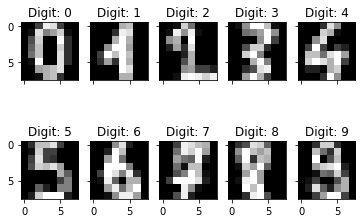

In [ ]:
digits = datasets.load_digits()
X, Y_linear = digits.data, digits.target

nrows, ncols = 2,5
fig, axs = plt.subplots(nrows, ncols, sharex=True, sharey=True)
#Show that the data was loaded correctly
for row in range(nrows):
  for col in range(ncols):
    y_label = row*ncols + col
    img_i = X[Y_linear==y_label]
    rand_ind = np.random.choice(img_i.shape[0])

    axs[row,col].set_title(f'Digit: {y_label}')
    axs[row,col].imshow(img_i[rand_ind].reshape((8,8)), cmap='gray')

plt.show()

### Convert Data into a Useable Form

In [ ]:
#Convert the labels into 1-hot-encoded form
N = X.shape[0]
Y_hot = np.zeros((N,10), dtype=np.int)
Y_hot[(np.array(range(N)), Y_linear)] = 1
#Normalize the input data
X /= np.max(X)

### Create 10 folds of randomized data

In [ ]:
def create_folds(X,Y, N=None):

  #Avoid overflow errors
  N = N if (N is not None) and (N*10 < X.shape[0]) else X.shape[0]//10

  #10 folds with N samples of digits
  X_folds = np.zeros((10, N, X.shape[1]))
  Y_folds = np.zeros((10, N, Y.shape[1]))

  for i in range(N):
    rand_ind = np.random.choice(X.shape[0], size=10, replace=False)
    X_folds[:,i,:] = X[rand_ind]
    Y_folds[:,i,:] = Y[rand_ind]
    
    #Remove the data that has already been used

    X = np.delete(X, rand_ind, axis=0)
    Y = np.delete(Y, rand_ind, axis=0)

  return X_folds, Y_folds

### Show that the folds have roughly the same number of instances of each class

In [ ]:
### CLEAN UP THE CLASS COUNT DISPLAY ###
X_folds, Y_folds = create_folds(X, Y_hot)

#Number of instances of each class in each of the folds
class_count = np.zeros((Y_folds.shape[0], Y_folds.shape[-1]))
for i in range(Y_folds.shape[0]):
  class_count[i] = np.sum(Y_folds[i], axis=0)

#Display the number of instances of each class in the folds
print('Number of instances of each class in the folds:\n')
print('Classes:  | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |')
print('          -----------------------------------------')
for i in range(len(class_count)):
  counts = '|'

  for count in class_count[i]:
    str_count = str(int(count))
    counts += '0' + str_count if len(str_count)==1 else str_count
    counts += ' |'

  fold_num = str(i+1)
  fold_num = '0' + fold_num if len(fold_num)==1 else fold_num
  print(f'Fold #{fold_num}: ' + counts)

class_std = np.std(class_count, axis=0)
fold_std  = np.std(class_count, axis=1)

print('\n\nStandard deviation between the classes:\n')
for i in range(len(class_std)):
  print(f'Digit {i}: {round(class_std[i],3)}')

print('\n\nStandard deviation between the folds:\n')
for i in range(len(fold_std)):
  print(f'Fold #{i+1}: {round(fold_std[i],3)}')

Number of instances of each class in the folds:

Classes:  | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
          -----------------------------------------
Fold #01: |18 |15 |13 |25 |17 |19 |20 |18 |13 |21 |
Fold #02: |15 |23 |26 |14 |16 |21 |16 |19 |14 |15 |
Fold #03: |20 |17 |14 |11 |18 |14 |24 |19 |23 |19 |
Fold #04: |13 |17 |18 |22 |24 |22 |14 |13 |15 |21 |
Fold #05: |22 |18 |23 |17 |15 |24 |17 |10 |17 |16 |
Fold #06: |19 |17 |13 |21 |17 |15 |19 |22 |18 |18 |
Fold #07: |15 |20 |16 |19 |23 |17 |26 |11 |14 |18 |
Fold #08: |16 |17 |21 |15 |18 |12 |15 |31 |19 |15 |
Fold #09: |18 |20 |20 |17 |15 |19 |20 |18 |14 |18 |
Fold #10: |22 |18 |13 |21 |17 |19 |10 |16 |25 |18 |


Standard deviation between the classes:

Digit 0: 2.891
Digit 1: 2.135
Digit 2: 4.428
Digit 3: 3.995
Digit 4: 2.933
Digit 5: 3.544
Digit 6: 4.504
Digit 7: 5.728
Digit 8: 3.894
Digit 9: 2.022


Standard deviation between the folds:

Fold #1: 3.506
Fold #2: 3.961
Fold #3: 3.859
Fold #4: 3.91
Fold #5: 3.961
Fold #6: 2.508
Fold

### Split the data into training, testing, and validation sets

In [ ]:
X_train, Y_train = X_folds[:8], Y_folds[:8]
X_val,   Y_val   = X_folds[8],  Y_folds[8]
X_test,  Y_test  = X_folds[9],  Y_folds[9]

#Reshape the training data to combine the folds into 1
X_train, Y_train = X_train.reshape(-1,X.shape[1]), Y_train.reshape(-1,Y_hot.shape[1])
print(f'Training input dimensions:    {X_train.shape}')
print(f'Training output dimensions:   {Y_train.shape}\n')

print(f'Validation input dimensions:  {X_val.shape}')
print(f'Validation output dimensions: {Y_val.shape}\n')

print(f'Testing input dimensions:     {X_test.shape}')
print(f'Testing output dimensions:    {Y_test.shape}\n')

Training input dimensions:    (1432, 64)
Training output dimensions:   (1432, 10)

Validation input dimensions:  (179, 64)
Validation output dimensions: (179, 10)

Testing input dimensions:     (179, 64)
Testing output dimensions:    (179, 10)



## Question 3

### Batch the data

In [ ]:
def batch(X, Y, batch_size=np.float('inf')):
  #If no batch size is entered, then no batching will occur
  if X.shape[0] <= batch_size:
    return X, Y
  else:
    batch_ind = np.random.choice(X.shape[0], size=batch_size)
    return X[batch_ind], Y[batch_ind]

### Train the Neural Network

Epoch: 100
Epoch: 200
Total Epochs: 284


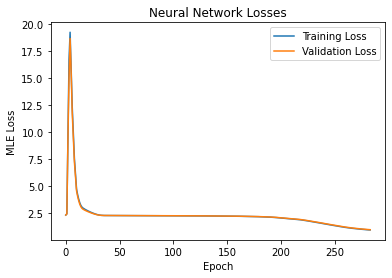

In [ ]:
#Create the Neural Network and the data
N = X_train.shape[1]
N_out = Y_train.shape[1]
N_1 = 550
NN = NeuralNetwork(N, N_1, N_out, scale=0.001)
lr = 0.0008

#Initialize the validation loss to something massive
validation_loss = np.float('inf')
#Initialize loss tracking variables
epochs = 0
train_loss = []
val_loss   = []

#We want to run for atleast 25 epochs, because the loss increases sharply at the beginning
while NN.J(X_val, Y_val) < validation_loss or epochs<25:
  epochs += 1

  if epochs%100 == 0:
    print(f'Epoch: {epochs}')

  #Append the losses 
  val_loss.append(NN.J(X_val, Y_val))
  train_loss.append(NN.J(X_train, Y_train))
  #Train the network
  X_batch, Y_batch = batch(X_train, Y_train)
  NN.update_params(X_train, Y_train, lr)
  
  #Update the validation check
  validation_loss = val_loss[-1]

print(f'Total Epochs: {epochs}')
#Display the Learning curve  
plt.title('Neural Network Losses')
plt.xlabel('Epoch')
plt.ylabel('MLE Loss')
plt.plot(range(epochs), train_loss, val_loss)
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

### Display the Neural Network's Accuracy on the Test data

In [ ]:
Y_label = np.argmax(Y_test, axis=1)
Y_predict = np.argmax(NN.predict(X_test), axis=1)

for i in range(10):
  class_ind = np.where(Y_label==i)
  labels_i, predictions_i = Y_label[class_ind], Y_predict[class_ind]

  acc_i = len(np.where(labels_i == predictions_i)[0]) / len(class_ind[0])
  print(f'Digit {i} has accuracy: {round(acc_i*100,2)}%')

acc = len(np.where(Y_label == Y_predict)[0]) / Y_label.shape[0]
print(f'\nThe Neural Network has an overall accuracy of: {round(acc*100,2)}%')
print(f'The Neural Network has an MLE loss of: {round(NN.J(X_test, Y_test),2)}')

Digit 0 has accuracy: 95.45%
Digit 1 has accuracy: 77.78%
Digit 2 has accuracy: 84.62%
Digit 3 has accuracy: 71.43%
Digit 4 has accuracy: 100.0%
Digit 5 has accuracy: 5.26%
Digit 6 has accuracy: 70.0%
Digit 7 has accuracy: 100.0%
Digit 8 has accuracy: 76.0%
Digit 9 has accuracy: 72.22%

The Neural Network has an overall accuracy of: 74.86%
The Neural Network has an MLE loss of: 0.93


## Question 4

Two things change when we switch to a sigmoid activation function and sum squared error cost function:

1.   All componenets of the gradient are multiplied by the term: 2$f(x)(1-f(x)))$

2.   The outputs of the neural network are no longer a probability of how likely the image pertains to a certain class

From 1, we can see that no learning will occur if the neural network predicts a value of 0 or 1. As such, no learning will occur once the neural network's outputs reach one of these values, regardless if these predictions are correct.

From 2, we can see that multiple output neurons can predict a value of 1. As such, the predictions can stray much further from the optimal solution when an incorrect prediction is made.

All in all, I would expect that the training would converge quite frequently to incorrect solutions, since the neural network can easily get stuck on incorrect predictions due to the first change. If it converges to the correct result, I believe the training will take longer due to the second change.








## Question 5

If we used a linear output and sum squared error cost, I think that the Network would regularly predict incorrectly for certain classes. 

In fact, there wouldn't even be classes. This would be more of a regression problem. The images would represent a value, rather than pertaining to a certain class.

I believe that the neural network would have a hard time predicting the value of classes that have structural similarity. For example, the images of a 4 and a 9, as seen below, have alot of similarities.Therefore, when givin an image in class 4 OR 9, the neural network would predict a value inbetween (say 6.5) instead of predicting a 4 OR a 9 (as it does in the neural network above).

Similarily, a neural network with this linear output would assume structural similarity between digits that are completely different. For example, the digit 4 is more structurally similar to 9, but this new neural network would assume that it is similar to 3 and 5 (despite little to no structural similarity)

All in all, I believe that this network would have a hard time classifying the digit images, since it would be assuming structural similarities where they might not exist.

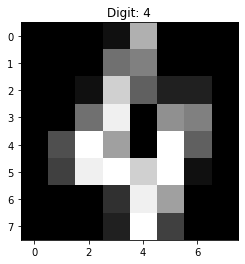

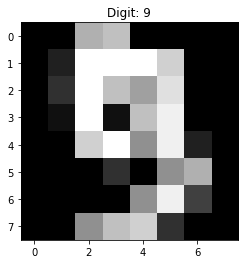

In [ ]:
four = X[np.where(Y_linear==4)][0]
plt.title('Digit: 4')
plt.imshow(four.reshape((8,8)), cmap='gray')
plt.show()

nine = X[np.where(Y_linear==9)][0]
plt.title('Digit: 9')
plt.imshow(nine.reshape((8,8)), cmap='gray')
plt.show()